In [10]:
# Import Library that we need to do this project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [12]:
# Read file /content/Bali_Tourism_Data - Sheet1.csv
df = pd.read_csv("/content/Bali_Tourism_Data - Sheet1.csv")
df

,Region,Panorama,Recreation Type,Target Prediction (y)
0,Kab. Badung,Beach,Photo Spot,Tegal Wangi Beach
1,Kab. Badung,Beach,Water Sports,Geger Beach
2,Kab. Badung,Beach,Sunbathing,Karma Kandara Beach
3,Kab. Badung,River / Waterfall,Swimming,Nungnung Waterfall
4,Kab. Badung,Urban,Photo Spot,The Abandoned Airplane
5,Kab. Badung,Urban,Restaurant,Natys Restaurants Seminyak
6,Kab. Bangli,Mountain,Trekking,Mountain Abang
7,Kab. Bangli,River / Waterfall,Photo Spot,Bangkian Djaran Waterfall
8,Kab. Bangli,Urban,Restaurant,The Amora Bali
9,Kab. Bangli,rice paddy / estate,Photo Spot,Pantunan Valley


In [13]:
# get the unique data from region
print(np.unique(df["Region"]))
region=np.unique(df["Region"])

['Kab. Badung' 'Kab. Bangli' 'Kab. Buleleng' 'Kab. Gianyar'
 'Kab. Jembrana' 'Kab. Karangasem' 'Kab. Klungkung' 'Kab. Tabanan'
 'Kota Denpasar']


In [14]:
# encode the region to variable regionEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
regionEncoder = label_encoder.fit_transform(region)
print(regionEncoder)

[0 1 2 3 4 5 6 7 8]


In [15]:
# make a new dataFrame and save all data from .csv that has encode 
df_le = pd.DataFrame()
df_le["Region_Encoded"] = label_encoder.fit_transform(df["Region"])
df_le["Panorama_Encoded"] = label_encoder.fit_transform(df["Panorama"])
df_le["Recreation Type_Encoded"] = label_encoder.fit_transform(df["Recreation Type"])
df_le["Target Prediction_Encoded"] = label_encoder.fit_transform(df["Target Prediction (y)"])
df_le

,Region_Encoded,Panorama_Encoded,Recreation Type_Encoded,Target Prediction_Encoded
0,0,0,4,43
1,0,0,10,15
2,0,0,7,21
3,0,2,8,34
4,0,3,4,46
5,0,3,5,33
6,1,1,9,30
7,1,2,4,3
8,1,3,5,47
9,1,4,4,35


In [17]:
# Divide the X and y
X = df_le.drop("Target Prediction_Encoded", axis=1)
y =  df_le["Target Prediction_Encoded"]

In [18]:
X

,Region_Encoded,Panorama_Encoded,Recreation Type_Encoded
0,0,0,4
1,0,0,10
2,0,0,7
3,0,2,8
4,0,3,4
5,0,3,5
6,1,1,9
7,1,2,4
8,1,3,5
9,1,4,4


In [19]:
y.nunique()

56

In [20]:
X.shape[1]

3

In [21]:
# Make a structur model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y.unique().shape[0], activation='softmax'))

lr = 0.015  # decide the learning rate

# Decide the optimizer with SGD
optimizer = SGD(learning_rate=lr)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 56)                952       
                                                                 
Total params: 12,328
Trainable params: 12,328
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_model = model.fit(X, y, batch_size=7, epochs=1000)

Epoch 1/1000
9/9 [==============================] - 1s 4ms/step - loss: 4.0612 - accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0348 - accuracy: 0.0351
Epoch 3/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0226 - accuracy: 0.0000e+00
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0101 - accuracy: 0.0000e+00
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0110 - accuracy: 0.0000e+00
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0058 - accuracy: 0.0351
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0023 - accuracy: 0.0526
Epoch 8/1000
9/9 [==============================] - 0s 2ms/step - loss: 4.0048 - accuracy: 0.0526
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 3.9943 - accuracy: 0.0351
Epoch 10/1000
9/9 [==============================] - 0s 2ms/step - loss: 3.9913 - accuracy: 0.0175
Epo

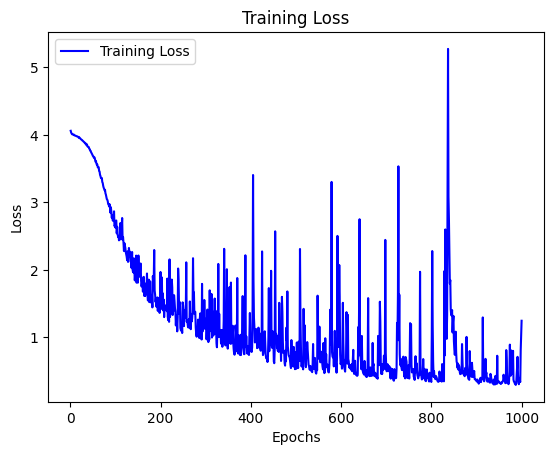

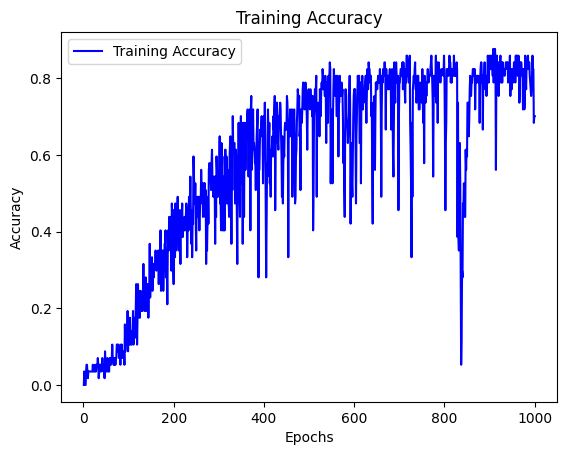

In [23]:
import matplotlib.pyplot as plt

history = history_model

# saving loss and accuracy from each epoch to the variable
loss = history.history['loss']
accuracy = history.history['accuracy']

# Set the x-axis as the number of epochs
epochs = range(1, len(loss) + 1)

# Plot loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [24]:
y_pred = model.predict(np.array([[4,1,10]]))
print(np.argmax(y_pred))

1/1 [==============================] - 0s 92ms/step
52


In [25]:
# Saving the model with format .h5
model.save('model.h5')

# Load model TensorFlow that trained before
model = tf.keras.models.load_model('model.h5')

# Convert model to the model Tensorflow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model TFlite to the file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)